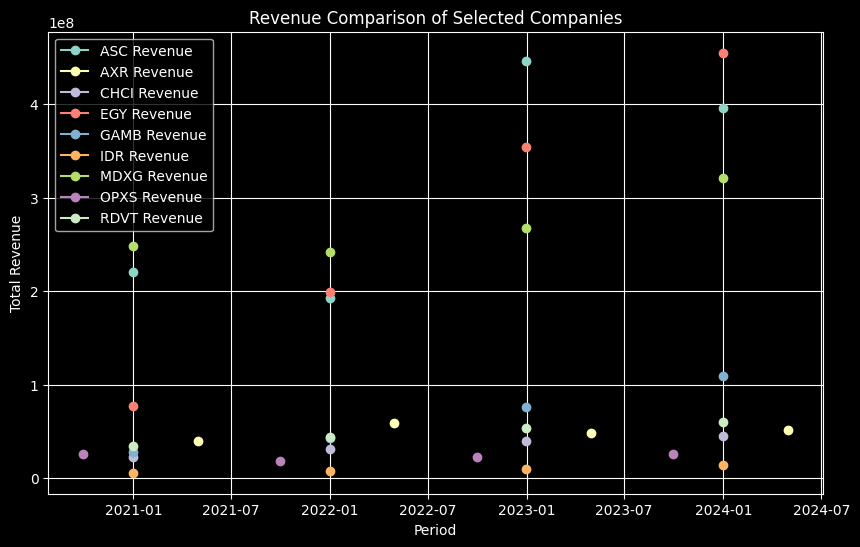

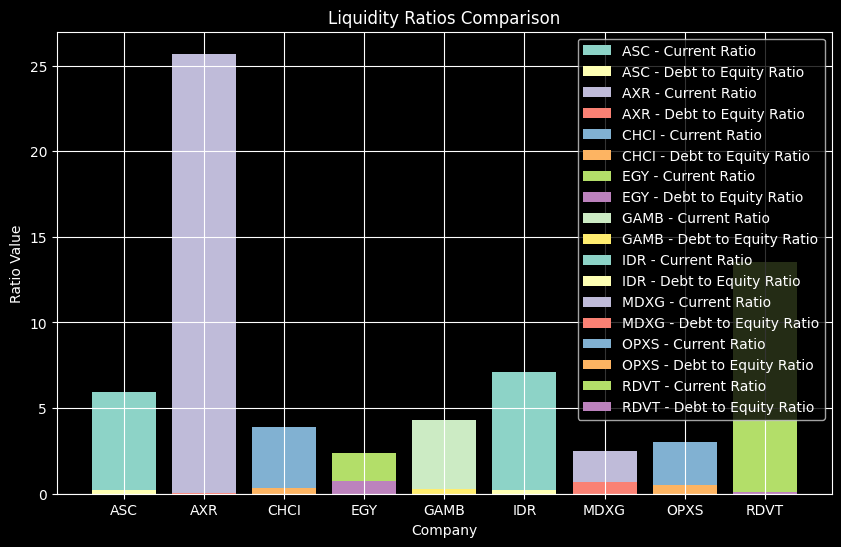

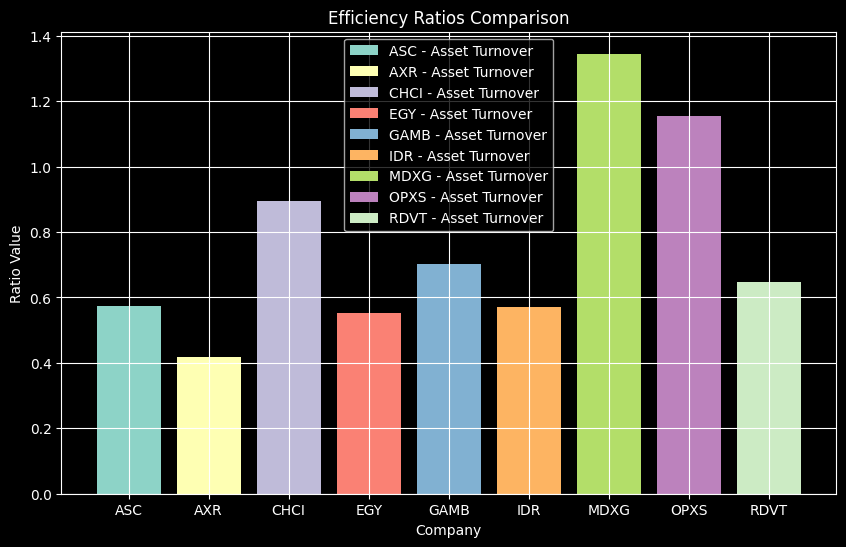

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define multiple tickers for comparison
tickers = ["ASC", "AXR", "CHCI", "EGY", "GAMB", "IDR", "MDXG", "OPXS", "RDVT"]

# Initialize lists to store the data
data_frames = []
liquidity_ratios_list = []
efficiency_ratios_list = []

# Function to fetch financial data and calculate ratios
def fetch_financials(ticker):
    try:
        # Fetch stock data
        stock = yf.Ticker(ticker)
        
        # Financials
        financials = stock.financials
        balance_sheet = stock.balance_sheet

        # Handle cases where financial data might be missing
        if financials.empty or balance_sheet.empty:
            print(f"Financial data for {ticker} is not available.")
            return None, None, None

        # Extract Key Metrics
        revenue = financials.loc['Total Revenue']
        gross_profit = financials.loc['Gross Profit']
        operating_income = financials.loc['Operating Income']
        net_income = financials.loc['Net Income']

        # Balance Sheet data (liquidity & solvency)
        total_assets = balance_sheet.loc['Total Assets'].iloc[0]
        total_liabilities = balance_sheet.loc['Total Liabilities Net Minority Interest'].iloc[0]
        shareholder_equity = balance_sheet.loc['Common Stock Equity'].iloc[0]

        # Create DataFrame for revenue and profitability metrics
        df = pd.DataFrame({
            f'{ticker} Revenue': revenue,
            f'{ticker} Gross Profit': gross_profit,
            f'{ticker} Operating Income': operating_income,
            f'{ticker} Net Income': net_income
        })

        # Liquidity and Efficiency Ratios
        liquidity_ratios = {
            "Current Ratio": total_assets / total_liabilities,
            "Debt to Equity Ratio": total_liabilities / shareholder_equity
        }

        efficiency_ratios = {
            "Asset Turnover": revenue.iloc[0] / total_assets
        }

        return df, liquidity_ratios, efficiency_ratios

    except Exception as e:
        print(f"An error occurred while processing {ticker}: {str(e)}")
        return None, None, None

# Loop over each ticker and fetch financials
for ticker in tickers:
    df, liquidity_ratios, efficiency_ratios = fetch_financials(ticker)
    if df is not None:
        data_frames.append(df)
        liquidity_ratios_list.append({ticker: liquidity_ratios})
        efficiency_ratios_list.append({ticker: efficiency_ratios})

# Combine data for all companies if available
if data_frames:
    combined_df = pd.concat(data_frames, axis=1)

    # Plotting with a black theme
    plt.style.use('dark_background')
    plt.figure(figsize=(10,6))

    # Plot revenue for all companies
    for column in combined_df.columns:  # Iterating over columns directly
        if 'Revenue' in column:
            plt.plot(combined_df.index, combined_df[column], marker='o', label=column)

    plt.xlabel("Period")
    plt.ylabel("Total Revenue")
    plt.title("Revenue Comparison of Selected Companies")
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot Liquidity Ratios
if liquidity_ratios_list:
    plt.figure(figsize=(10,6))
    for ratios in liquidity_ratios_list:
        for company, values in ratios.items():
            plt.bar(company, values["Current Ratio"], label=f"{company} - Current Ratio")
            plt.bar(company, values["Debt to Equity Ratio"], label=f"{company} - Debt to Equity Ratio")

    plt.xlabel("Company")
    plt.ylabel("Ratio Value")
    plt.title("Liquidity Ratios Comparison")
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot Efficiency Ratios
if efficiency_ratios_list:
    plt.figure(figsize=(10,6))
    for ratios in efficiency_ratios_list:
        for company, values in ratios.items():
            plt.bar(company, values["Asset Turnover"], label=f"{company} - Asset Turnover")

    plt.xlabel("Company")
    plt.ylabel("Ratio Value")
    plt.title("Efficiency Ratios Comparison")
    plt.legend()
    plt.grid(True)
    plt.show()


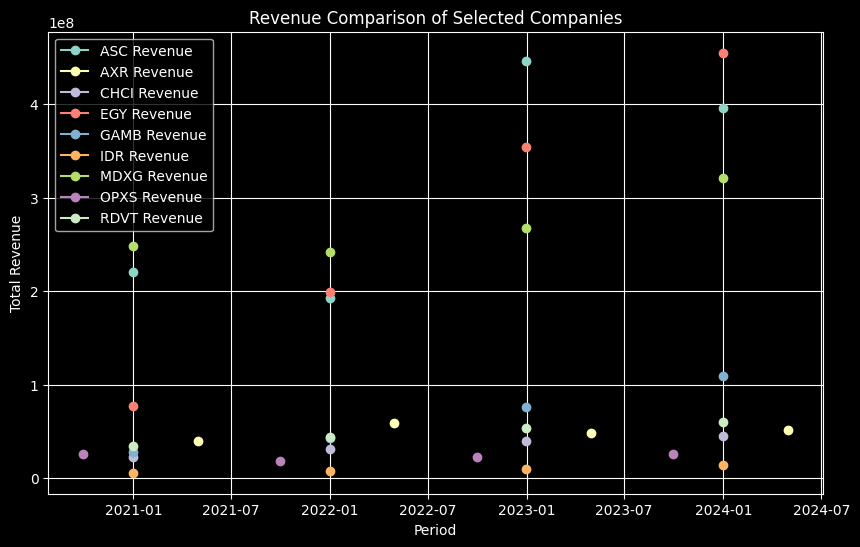

In [2]:
# Plotting with a black theme
plt.figure(figsize=(10,6))

# Plot revenue for all companies with lines connecting the dots
for column in combined_df.columns:  # Iterating over columns directly
    if 'Revenue' in column:
        plt.plot(combined_df.index, combined_df[column], marker='o', linestyle='-', label=column)  # Added linestyle='-' to connect the dots

plt.xlabel("Period")
plt.ylabel("Total Revenue")
plt.title("Revenue Comparison of Selected Companies")
plt.legend()
plt.grid(True)
plt.show()

In [3]:
import pandas as pd

# Assuming 'combined_df' is the name of the DataFrame containing your data
display(combined_df)

,ASC Revenue,ASC Gross Profit,ASC Operating Income,ASC Net Income,AXR Revenue,AXR Gross Profit,AXR Operating Income,AXR Net Income,CHCI Revenue,CHCI Gross Profit,...,MDXG Operating Income,MDXG Net Income,OPXS Revenue,OPXS Gross Profit,OPXS Operating Income,OPXS Net Income,RDVT Revenue,RDVT Gross Profit,RDVT Operating Income,RDVT Net Income
2019-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,25890000.0,6088000.0,2883000.0,1825000.0,NaN,NaN,NaN,NaN
2020-12-31,220058000.0,43416000.0,24800000.0,-6046000.0,NaN,NaN,NaN,NaN,22487000.0,4042000.0,...,-44371000.0,-49284000.0,NaN,NaN,NaN,NaN,34586000.0,23310000.0,-6831000.0,-6813000.0
2021-04-30,NaN,NaN,NaN,NaN,40069000.0,14467000.0,9047000.0,7392000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,18222000.0,2520000.0,-494000.0,2131000.0,NaN,NaN,NaN,NaN
2021-12-31,192484000.0,8049000.0,-14756000.0,-36832000.0,NaN,NaN,NaN,NaN,31093000.0,6444000.0,...,-6998000.0,-12301000.0,NaN,NaN,NaN,NaN,44022000.0,32827000.0,-1315000.0,655000.0
2022-04-30,NaN,NaN,NaN,NaN,58926000.0,26657000.0,21303000.0,15862000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,22383000.0,4897000.0,1647000.0,1283000.0,NaN,NaN,NaN,NaN
2022-12-31,445741000.0,195531000.0,163615000.0,138454000.0,NaN,NaN,NaN,NaN,39313000.0,9942000.0,...,-14727000.0,-19953000.0,NaN,NaN,NaN,NaN,53318000.0,41107000.0,361000.0,616000.0
